# 로지스틱 회귀 분석

In [4]:
getwd()

[1] "d:/workspace/R_practice/data/R_data"

In [22]:
library(dplyr)

In [6]:
data = read.csv('programming.csv')
head(data)

Experience,Success
14,0
29,0
6,0
25,1
18,1
4,0


In [16]:
model = glm(Success ~ .,data = data, family = binomial(logit))
summary(model)


Call:
glm(formula = Success ~ ., family = binomial(logit), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8992  -0.7509  -0.4140   0.7992   1.9624  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -3.05970    1.25935  -2.430   0.0151 *
Experience   0.16149    0.06498   2.485   0.0129 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34.296  on 24  degrees of freedom
Residual deviance: 25.425  on 23  degrees of freedom
AIC: 29.425

Number of Fisher Scoring iterations: 4


In [23]:
cbind(data$Experience, model$fitted.values)

14,0.31026237
29,0.83526292
6,0.10999616
25,0.72660237
18,0.46183704
4,0.08213002
18,0.46183704
12,0.24566554
22,0.62081158
6,0.10999616
30,0.85629862


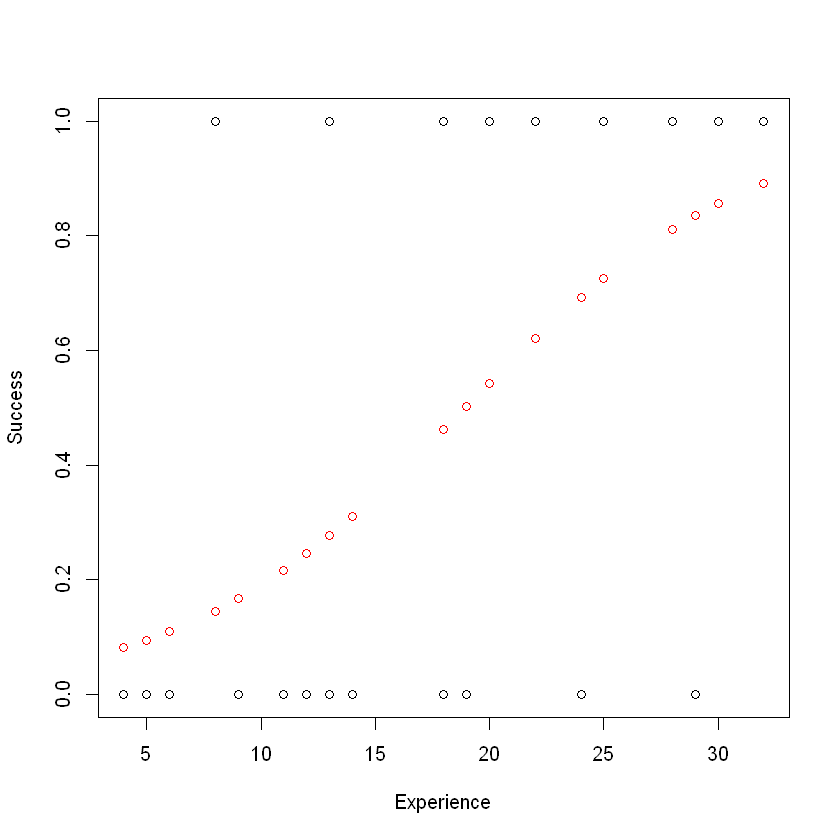

In [29]:
plot(Success ~ Experience, data = data)
points(model$fitted.values ~ data$Experience, col = 2)

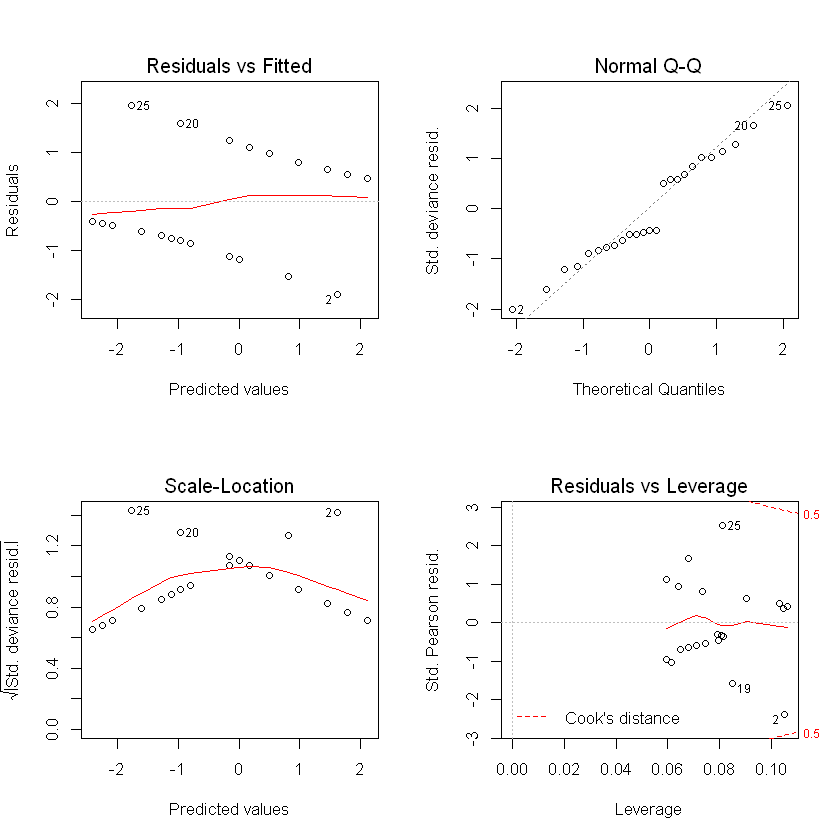

In [24]:
par(mfrow = c(2,2))
plot(model)

In [38]:
table(model$fitted.values > 0.5, data$Success)

       
         0  1
  FALSE 11  3
  TRUE   3  8

In [37]:
c('민감도 ' = 8/11, '특이도 ' = 11/14)

민감도    특이도  
0.7272727 0.7857143

In [39]:
data = read.csv('coupon.csv')
head(data)

Price_reduc,N,N_redeemed
5,200,30
10,200,55
15,200,70
20,200,100
30,200,137


In [41]:
model2 = glm(cbind(N_redeemed, N-N_redeemed) ~ Price_reduc, data = data, family = binomial(logit))
summary(model2)


Call:
glm(formula = cbind(N_redeemed, N - N_redeemed) ~ Price_reduc, 
    family = binomial(logit), data = data)

Deviance Residuals: 
      1        2        3        4        5  
-0.8988   0.6677  -0.1837   0.7612  -0.5477  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.044348   0.160977  -12.70   <2e-16 ***
Price_reduc  0.096834   0.008549   11.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 149.4627  on 4  degrees of freedom
Residual deviance:   2.1668  on 3  degrees of freedom
AIC: 33.793

Number of Fisher Scoring iterations: 3


In [42]:
exp(0.096834)

[1] 1.101677

In [44]:
data = read.csv('disease.csv')
head(data)

age,status_middle,status_lower,sector,disease
33,0,0,0,0
35,0,0,0,0
6,0,0,0,0
60,0,0,0,0
18,0,1,0,1
26,0,1,0,0


In [46]:
model3 = glm(disease ~ ., data = data, family = binomial(logit))
summary(model3)


Call:
glm(formula = disease ~ ., family = binomial(logit), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6552  -0.7529  -0.4788   0.8558   2.0977  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.31293    0.64259  -3.599 0.000319 ***
age            0.02975    0.01350   2.203 0.027577 *  
status_middle  0.40879    0.59900   0.682 0.494954    
status_lower  -0.30525    0.60413  -0.505 0.613362    
sector         1.57475    0.50162   3.139 0.001693 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 122.32  on 97  degrees of freedom
Residual deviance: 101.05  on 93  degrees of freedom
AIC: 111.05

Number of Fisher Scoring iterations: 4


In [47]:
model4 = glm(disease ~ age + sector, data = data, family = binomial(logit))
summary(model4)


Call:
glm(formula = disease ~ age + sector, family = binomial(logit), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7296  -0.7048  -0.4940   0.9870   2.0929  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.33515    0.51113  -4.569 4.91e-06 ***
age          0.02929    0.01317   2.224 0.026153 *  
sector       1.67345    0.48734   3.434 0.000595 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 122.32  on 97  degrees of freedom
Residual deviance: 102.26  on 95  degrees of freedom
AIC: 108.26

Number of Fisher Scoring iterations: 4


In [79]:
# full 모델에서 종속변수와 상호작용하지 않는 status 두 변수를 제외했을 때 이 두 변수가 정말 종속변수와 상호작용을 하지 않는지에 대해서
# 검증하기 위해 카이제곱 검정을 통해 독립성 검증
anova(model3, model4, test = 'Chisq')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
93,101.0542,NA,NA,NA
95,102.2593,-2,-1.205179,0.5473924


In [52]:
table(data$disease)


 0  1 
67 31 

In [53]:
31/98

[1] 0.3163265

In [56]:
kk = table(data$disease, model4$fitted.values > 0.3163265)
kk

   
    FALSE TRUE
  0    47   20
  1     8   23

In [66]:
reduce_M = c('민감도' = 23/31, '특이도' = 47/67)
reduce_M

민감도    특이도 
0.7419355 0.7014925

In [57]:
sum(kk)

[1] 98

In [63]:
kk1 = table(data$disease, model3$fitted.values > 0.3163265)
kk1

   
    FALSE TRUE
  0    49   18
  1     8   23

In [65]:
fulmodel_M = c('민감도' = 23/31, '특이도' = 49/67)
fulmodel_M

민감도    특이도 
0.7419355 0.7313433

In [72]:
kk1

   
    FALSE TRUE
  0    49   18
  1     8   23

In [71]:
err_m1 = 28/sum(kk)
err_m1

[1] 0.2857143

In [69]:
err_m2 = 26/sum(kk1)
err_m2

[1] 0.2653061

In [73]:
install.packages('Deducer')

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'SparseM', 'MatrixModels', 'conquer', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'mitools', 'JavaGD', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'mvtnorm', 'TH.data', 'sandwich', 'survey', 'estimability', 'JGR', 'car', 'e1071', 'multcomp', 'effects'




  There is a binary version available but the source version is later:
         binary source needs_compilation
quantreg   5.55   5.61              TRUE

  Binaries will be installed
package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\14\.conda\envs\tf2\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll를 C:\Users\14\.conda\envs\tf2\Lib\R\library\Rcpp\libs\x64\Rcpp.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'mitools' successfully unpacked and MD5 sums checked
package 'JavaGD' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'm

In [75]:
library('Deducer')

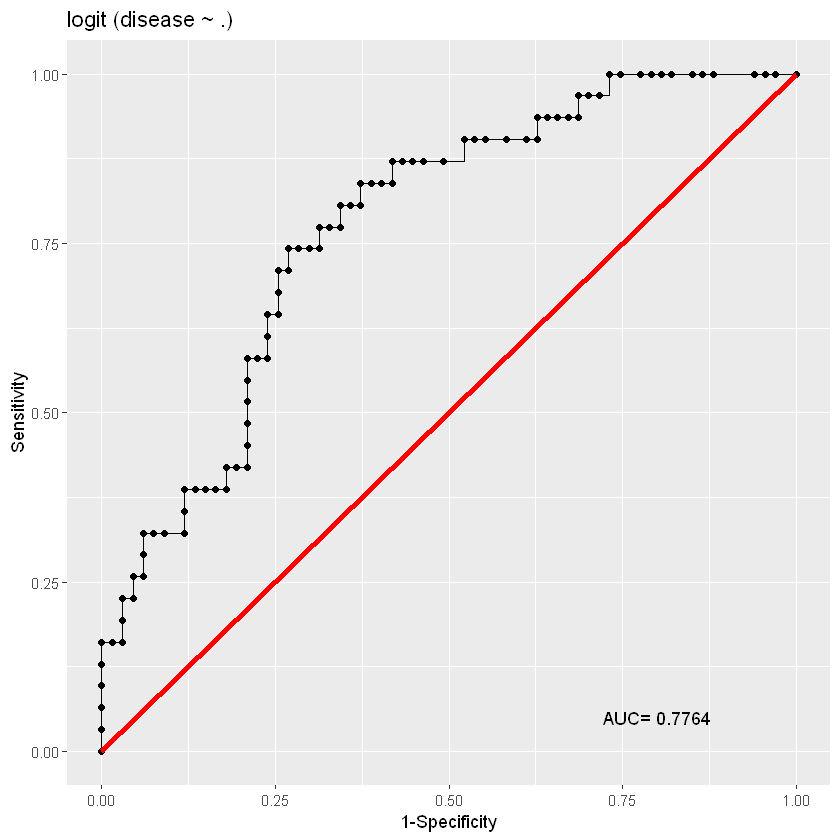

In [76]:
rocplot(model3)

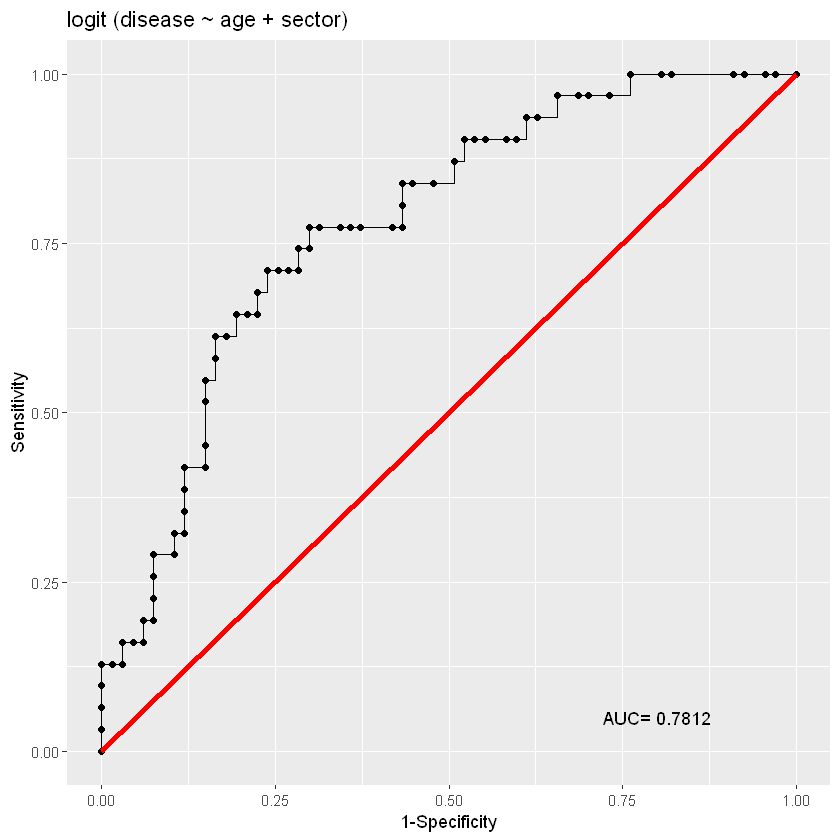

In [77]:
rocplot(model4)

In [80]:
data = read.csv('flushot.csv')
head(data)

flushot,age,aware,gender
0,59,52,0
0,61,55,1
1,82,51,0
0,51,70,0
0,53,70,0
0,62,49,1


In [81]:
log_model = glm(flushot ~., data = data, family = binomial(logit))
summary(log_model)


Call:
glm(formula = flushot ~ ., family = binomial(logit), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4037  -0.5637  -0.3352  -0.1542   2.9394  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.17716    2.98242  -0.395  0.69307   
age          0.07279    0.03038   2.396  0.01658 * 
aware       -0.09899    0.03348  -2.957  0.00311 **
gender       0.43397    0.52179   0.832  0.40558   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.94  on 158  degrees of freedom
Residual deviance: 105.09  on 155  degrees of freedom
AIC: 113.09

Number of Fisher Scoring iterations: 6


In [82]:
exp(0.07279)

[1] 1.075505

In [83]:
exp(-0.09899)

[1] 0.9057518

In [84]:
exp(0.43397)

[1] 1.543373

In [85]:
log_model2 = glm(flushot ~ age + aware, data = data, family = binomial(logit))
summary(log_model2)


Call:
glm(formula = flushot ~ age + aware, family = binomial(logit), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4479  -0.5708  -0.3390  -0.1629   2.8430  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.45778    2.91534  -0.500  0.61705   
age          0.07787    0.02970   2.622  0.00873 **
aware       -0.09547    0.03241  -2.946  0.00322 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.94  on 158  degrees of freedom
Residual deviance: 105.80  on 156  degrees of freedom
AIC: 111.8

Number of Fisher Scoring iterations: 6


In [87]:
anova(log_model, log_model2, test = 'Chisq')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
155,105.0932,NA,NA,NA
156,105.7954,-1,-0.7022111,0.4020417


In [88]:
table(data$flushot)


  0   1 
135  24 

In [89]:
24/159

[1] 0.1509434

In [92]:
kk = table(data$flushot, log_model2$fitted.values > 0.15094)
kk

   
    FALSE TRUE
  0    95   40
  1     5   19

In [95]:
tt = table(data$flushot, log_model2$fitted.values > 0.1)
tt

   
    FALSE TRUE
  0    77   58
  1     3   21

In [96]:
c('민감도' = 21/24, '특이도' = 77/135, '에러율' = 61/sum(tt))

민감도    특이도    에러율 
0.8750000 0.5703704 0.3836478

In [93]:
c('민감도' = 19/24, '특이도' = 95/135, '에러율' = 45/sum(kk))

민감도    특이도    에러율 
0.7916667 0.7037037 0.2830189

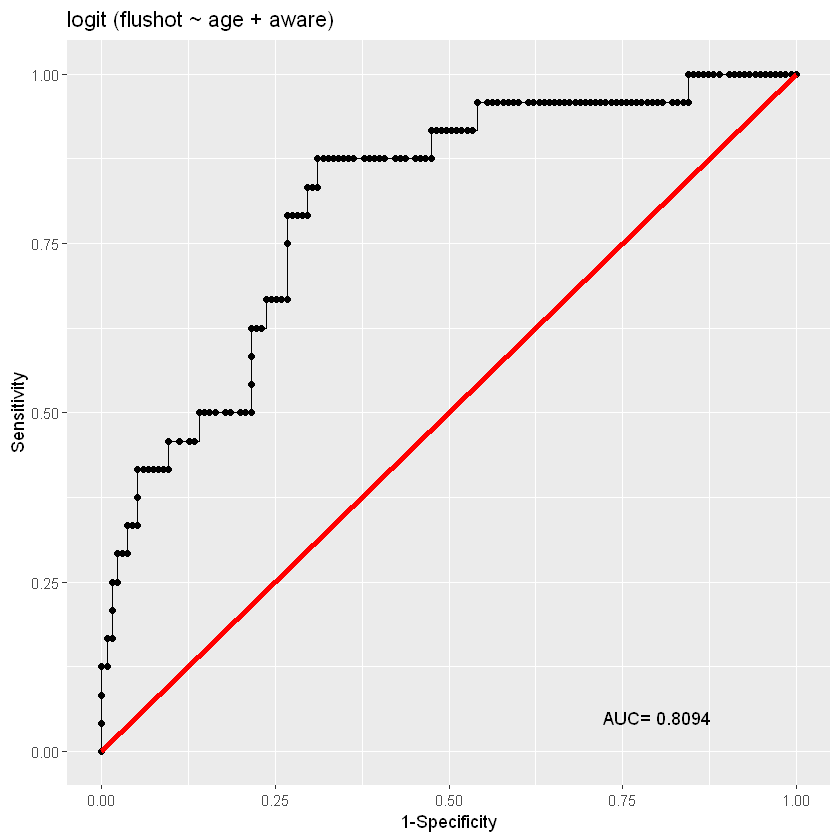

In [94]:
rocplot(log_model2)

In [99]:
res01 = c(민감도 = tt[2, 2]/sum(tt[2,]), 특이도 = tt[1,1]/sum(tt[1,]), 에러율 = sum(tt[1,2], tt[2,1]) / sum(tt))
res01

민감도    특이도    에러율 
0.8750000 0.5703704 0.3836478

In [100]:
crime = read.csv('http://datasets.flowingdata.com/crimeRatesByState-formatted.csv')
head(crime)

state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8


In [101]:
rownames(crime) = crime[,1]
head(crime)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
United States,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
Alabama,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
Alaska,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
Arizona,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
Arkansas,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
California,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8


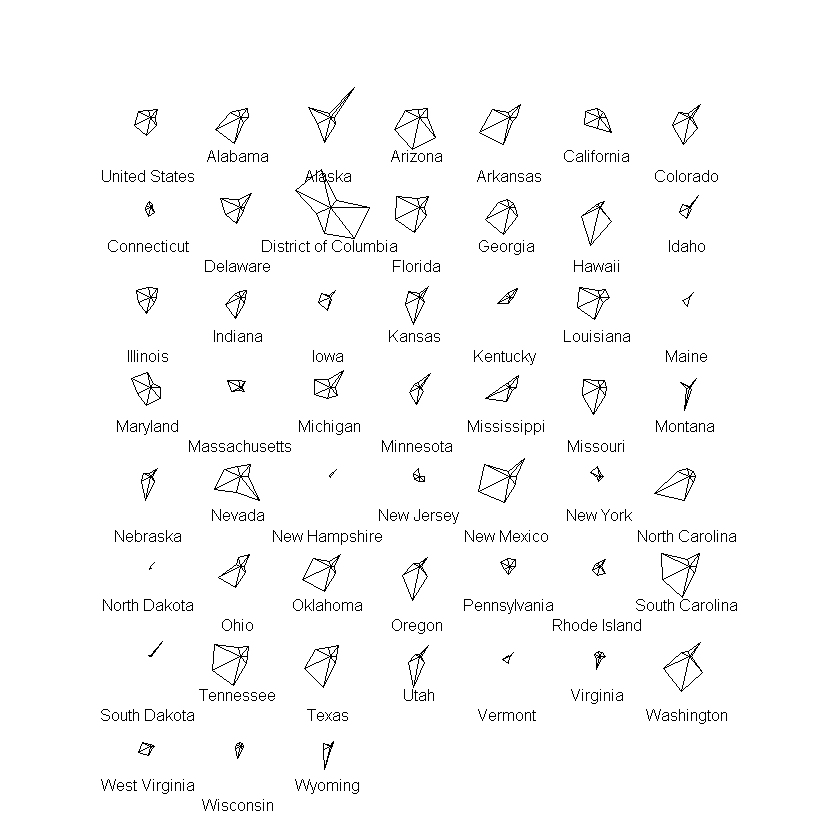

In [102]:
stars(crime[,2:8])

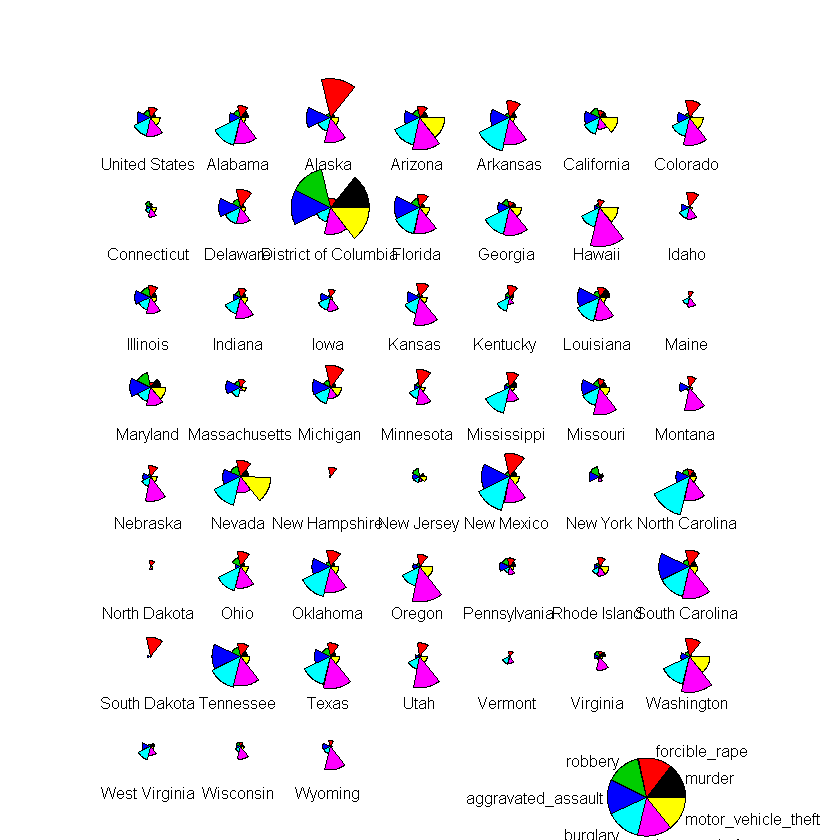

In [105]:
stars(crime[,2:8], flip.labels = FALSE, key.loc = c(15, 1), draw.segments = TRUE)

In [106]:
install.packages('aplpack')

package 'aplpack' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\RtmpEvNUHn\downloaded_packages


In [107]:
library('aplpack')

effect of variables:
 modified item       Var                  
 "height of face   " "murder"             
 "width of face    " "forcible_rape"      
 "structure of face" "robbery"            
 "height of mouth  " "aggravated_assault" 
 "width of mouth   " "burglary"           
 "smiling          " "larceny_theft"      
 "height of eyes   " "motor_vehicle_theft"
 "width of eyes    " "murder"             
 "height of hair   " "forcible_rape"      
 "width of hair   "  "robbery"            
 "style of hair   "  "aggravated_assault" 
 "height of nose  "  "burglary"           
 "width of nose   "  "larceny_theft"      
 "width of ear    "  "motor_vehicle_theft"
 "height of ear   "  "murder"             


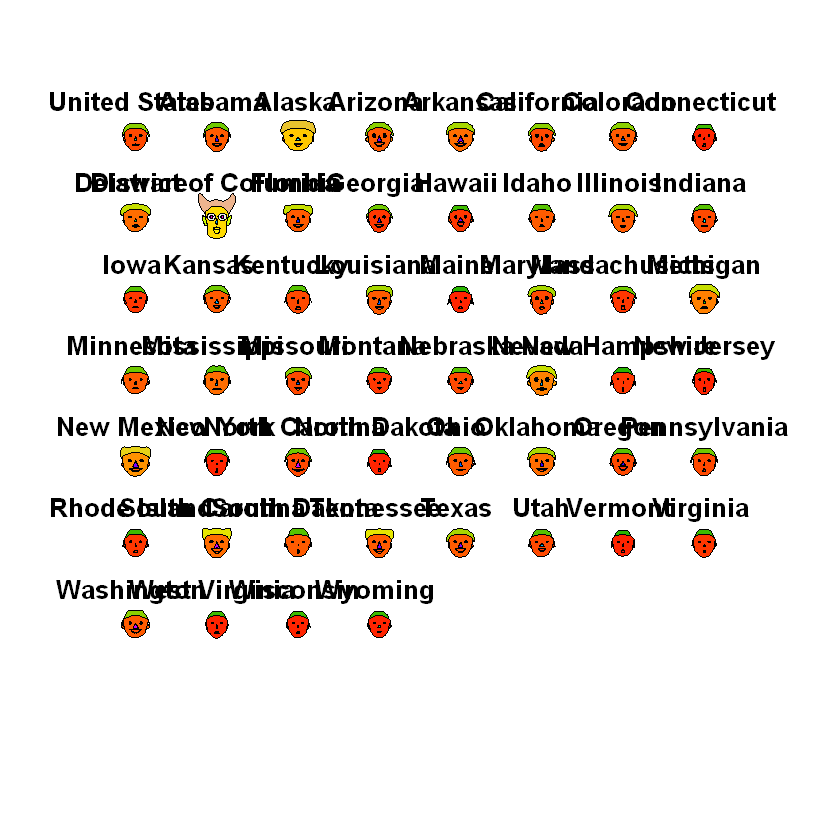

In [108]:
faces(crime[,2:8])

## 평행좌표플롯

In [110]:
education = read.csv('http://datasets.flowingdata.com/education.csv')
head(education)

state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
United States,501,515,493,46,7.9,4.4
Alabama,557,552,549,7,6.7,2.3
Alaska,520,516,492,46,7.9,7.3
Arizona,516,521,497,26,10.4,7.6
Arkansas,572,572,556,5,6.8,4.6
California,500,513,498,49,10.9,5.5


In [111]:
library('lattice')

Warning message:
"'parallel' is deprecated.
Use 'parallelplot' instead.
See help("Deprecated")"

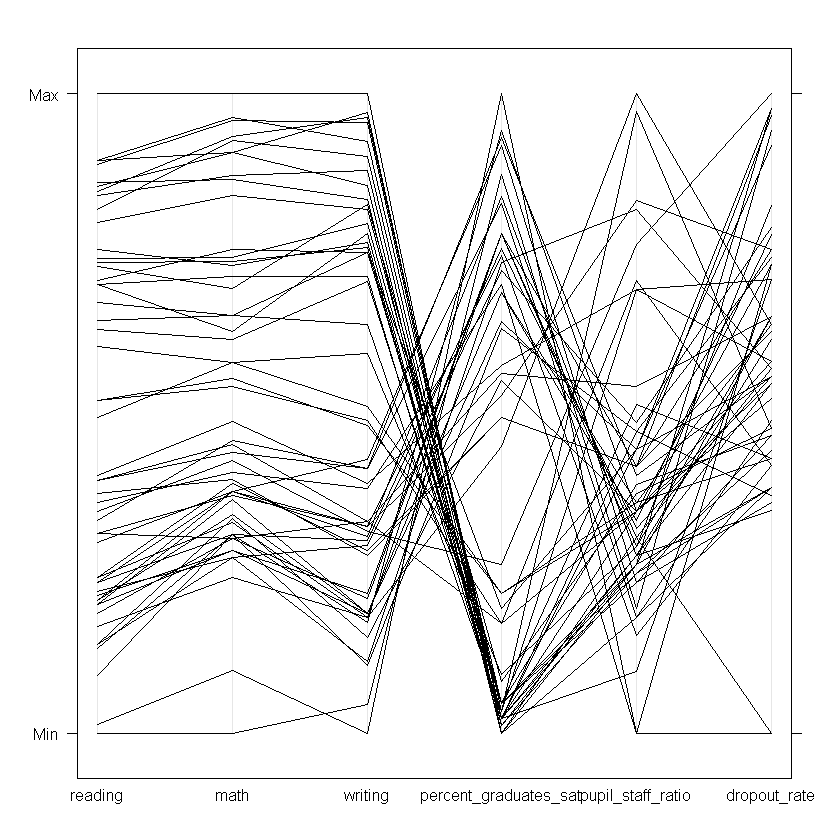

In [113]:
parallel(education[,2:7], horizontal.axis = FALSE, col = 1)

In [114]:
summary(education$reading)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  466.0   497.8   523.0   533.8   571.2   610.0 

In [115]:
color = education$reading > 523
color

[1] FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[13] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[37]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE
[49]  TRUE FALSE  TRUE  TRUE

In [116]:
color+1

[1] 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 1 1 2 2 2
[39] 1 1 1 1 2 2 1 2 1 1 2 1 2 2

In [122]:
library('plotly')
library('ggplot2')

Warning message:
"'parallel' is deprecated.
Use 'parallelplot' instead.
See help("Deprecated")"

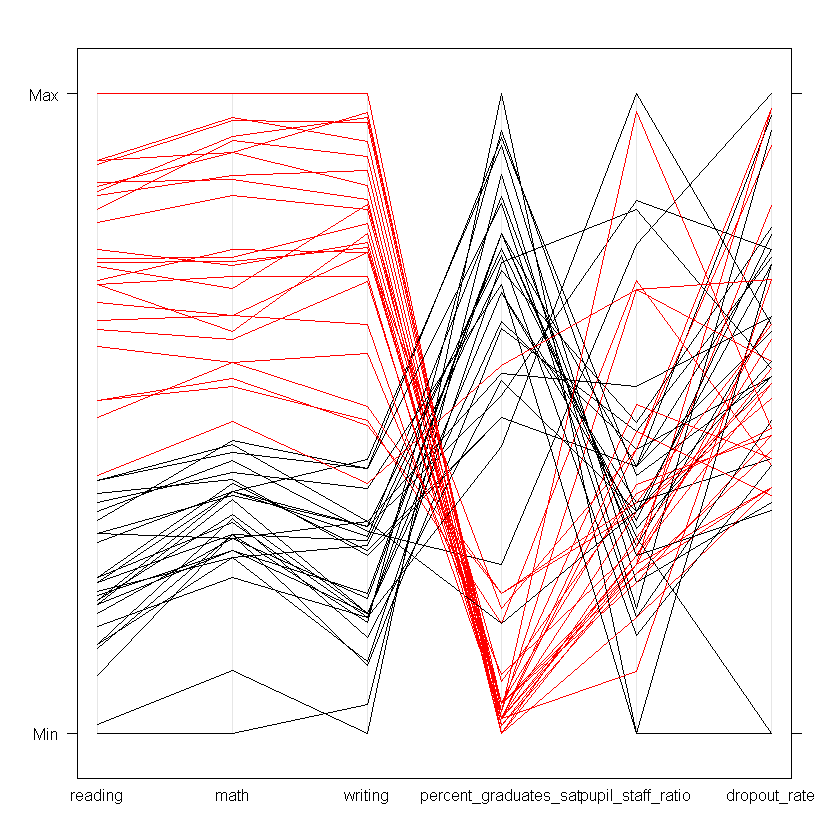

In [125]:
parallel(education[,2:7], horizontal.axis = FALSE, col = color +1)

In [126]:
summary(education$dropout_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   2.950   3.950   4.079   5.300   7.600 

In [127]:
color = education$dropout_rate > 5.3
color

[1] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[13]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
[37] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE

Warning message:
"'parallel' is deprecated.
Use 'parallelplot' instead.
See help("Deprecated")"

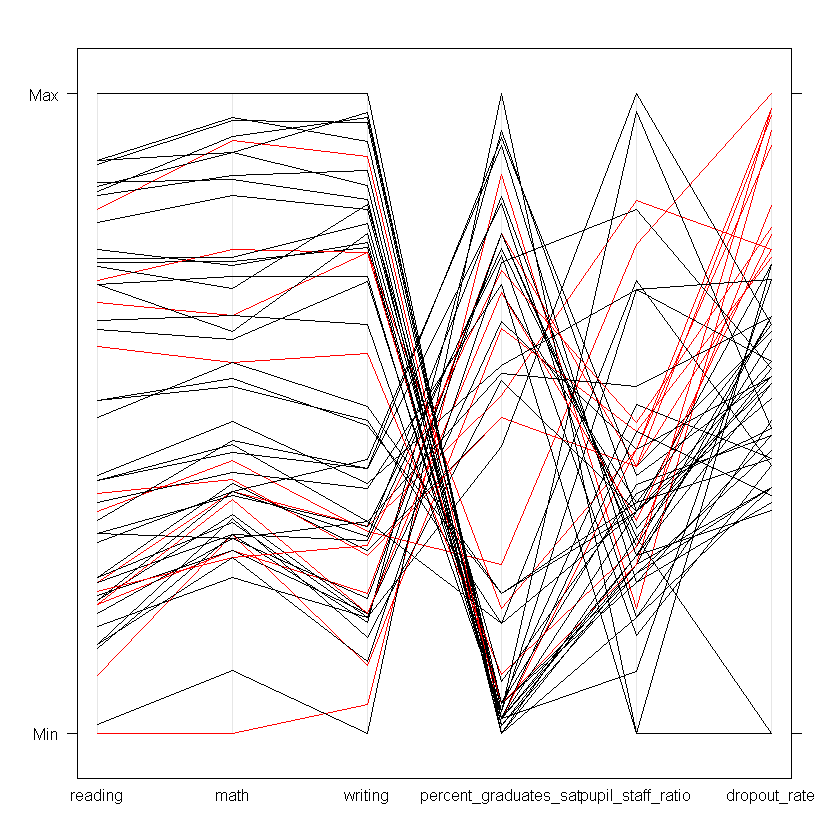

In [128]:
parallel(education[,2:7], horizontal.axis = FALSE, col = color +1)

## 주성분 분석

In [140]:
data = read.csv(("20140528_baseball.csv"))
head(data)

팀,승률,타율,장타율,출루율,평균자책
KIA,0.455,0.285,0.424,0.345,5.40
LG,0.372,0.276,0.380,0.358,5.08
NC,0.578,0.283,0.445,0.360,4.11
SK,0.444,0.275,0.409,0.347,5.59
넥센,0.545,0.283,0.471,0.372,5.44
두산,0.568,0.307,0.468,0.378,5.03


In [141]:
model = prcomp(data[,2:6], scale = TRUE)
model

Standard deviations (1, .., p=5):
[1] 1.7459687 1.0357284 0.7145706 0.5838463 0.1654456

Rotation (n x k) = (5 x 5):
                PC1         PC2        PC3        PC4         PC5
승률      0.5215895  0.33120383 -0.1748563  0.2606055  0.72094280
타율      0.4462277 -0.38537741 -0.2716813 -0.7580688  0.06233844
장타율    0.5212973 -0.09440319 -0.4035437  0.4505809 -0.59453048
출루율    0.3756259 -0.50066425  0.7476766  0.2128245  0.06265704
평균자책 -0.3405577 -0.69441459 -0.4168293  0.3303015  0.34491013

In [142]:
summary(model)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     1.7460 1.0357 0.7146 0.58385 0.16545
Proportion of Variance 0.6097 0.2145 0.1021 0.06818 0.00547
Cumulative Proportion  0.6097 0.8242 0.9264 0.99453 1.00000

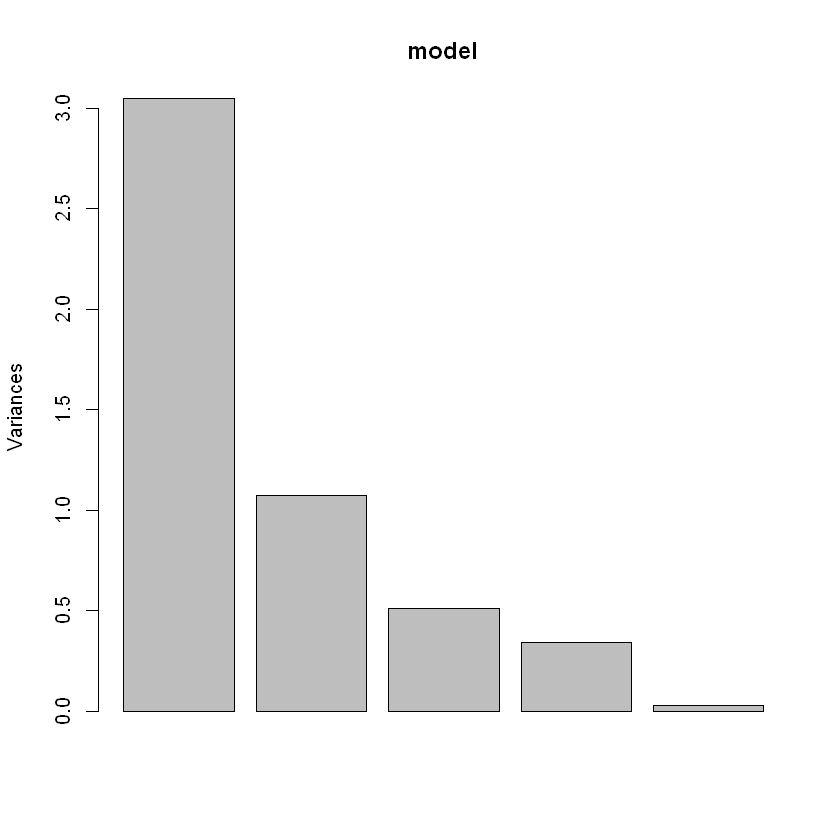

In [143]:
plot(model)

In [145]:
rownames(data) = data[,1]
head(data)

,팀,승률,타율,장타율,출루율,평균자책
KIA,KIA,0.455,0.285,0.424,0.345,5.40
LG,LG,0.372,0.276,0.380,0.358,5.08
NC,NC,0.578,0.283,0.445,0.360,4.11
SK,SK,0.444,0.275,0.409,0.347,5.59
넥센,넥센,0.545,0.283,0.471,0.372,5.44
두산,두산,0.568,0.307,0.468,0.378,5.03


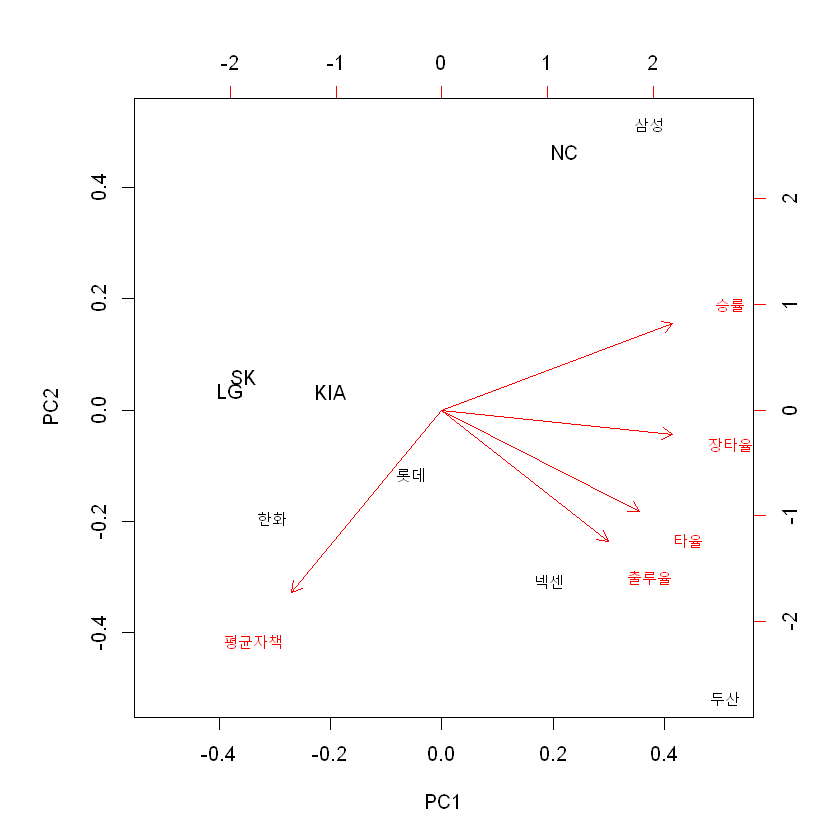

In [146]:
model = prcomp(data[,2:6], scale = T)
biplot(model)

## 다변량분석 연습

In [147]:
data = read.csv("20140528_baseball.csv")
head(data)

팀,승률,타율,장타율,출루율,평균자책
KIA,0.455,0.285,0.424,0.345,5.40
LG,0.372,0.276,0.380,0.358,5.08
NC,0.578,0.283,0.445,0.360,4.11
SK,0.444,0.275,0.409,0.347,5.59
넥센,0.545,0.283,0.471,0.372,5.44
두산,0.568,0.307,0.468,0.378,5.03


In [148]:
rownames(data) = data[,1]
head(data)

,팀,승률,타율,장타율,출루율,평균자책
KIA,KIA,0.455,0.285,0.424,0.345,5.40
LG,LG,0.372,0.276,0.380,0.358,5.08
NC,NC,0.578,0.283,0.445,0.360,4.11
SK,SK,0.444,0.275,0.409,0.347,5.59
넥센,넥센,0.545,0.283,0.471,0.372,5.44
두산,두산,0.568,0.307,0.468,0.378,5.03


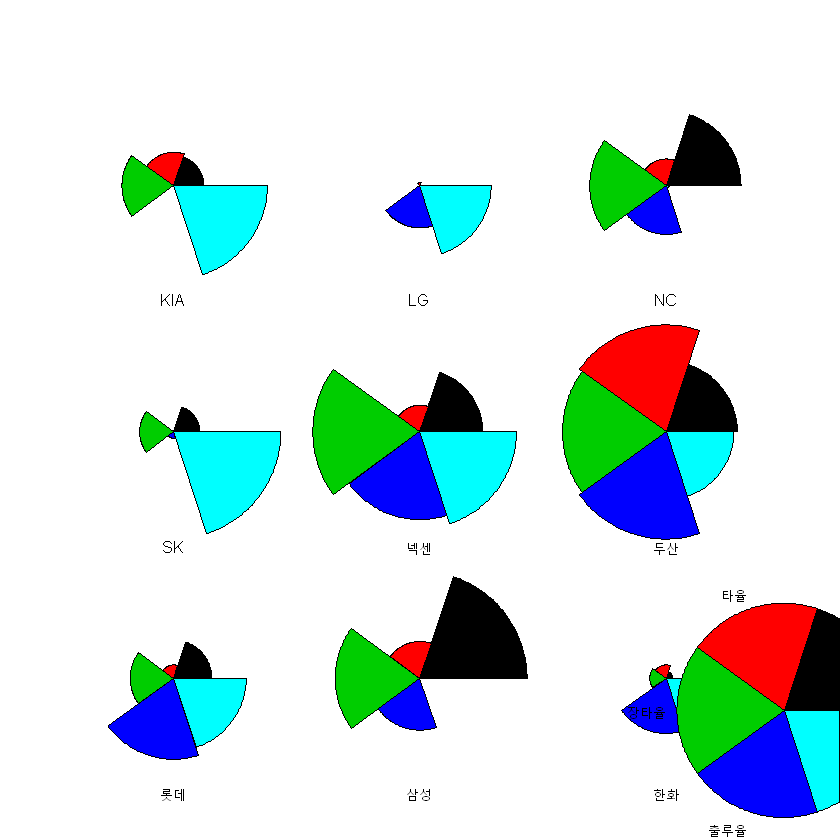

In [158]:
stars(data[,2:6], flip.labels = F, key.loc = c(8, 2), draw.segments = T)

effect of variables:
 modified item       Var       
 "height of face   " "승률"    
 "width of face    " "타율"    
 "structure of face" "장타율"  
 "height of mouth  " "출루율"  
 "width of mouth   " "평균자책"
 "smiling          " "승률"    
 "height of eyes   " "타율"    
 "width of eyes    " "장타율"  
 "height of hair   " "출루율"  
 "width of hair   "  "평균자책"
 "style of hair   "  "승률"    
 "height of nose  "  "타율"    
 "width of nose   "  "장타율"  
 "width of ear    "  "출루율"  
 "height of ear   "  "평균자책"


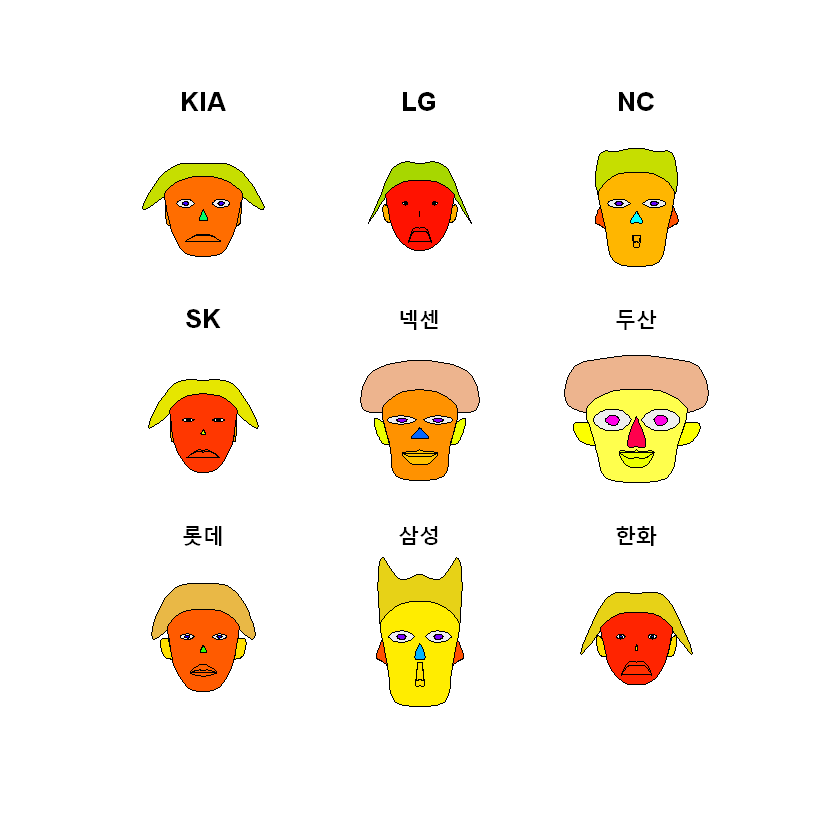

In [159]:
faces(data[,2:6])

In [160]:
#2
bb2013 = read.csv("2013_baseball.csv")
head(bb2013)

선수명,포지션,팀,홈런,타점,도루,볼넷,삼진,타율,장타율,출루율
이병규,우익수,LG,5,74,2,22,40,0.348,0.455,0.384
손아섭,우익수,롯데,11,69,36,64,88,0.345,0.474,0.421
이진영,우익수,LG,3,62,6,37,42,0.329,0.429,0.390
박용택,중견수,LG,7,67,13,52,71,0.328,0.435,0.393
김태균,1루수,한화,10,52,0,73,67,0.319,0.475,0.444
민병헌,우익수,두산,9,65,27,40,62,0.319,0.480,0.387


In [162]:
position = bb2013$포지션
head(position)

[1] 우익수 우익수 우익수 중견수 1루수  우익수
Levels: 1루수 2루수 3루수 우익수 유격수 좌익수 중견수 포수

In [163]:
base2_pos = bb2013[,c(2,4:11)]
base2_pos2 = aggregate(base2_pos[,2:9], by = list(포지션 = base2_pos$포지션), sum)
head(base2_pos2)

포지션,홈런,타점,도루,볼넷,삼진,타율,장타율,출루율
1루수,126,564,32,436,650,2.296,3.683,2.962
2루수,20,152,60,172,239,1.052,1.435,1.379
3루수,113,473,86,367,549,2.026,3.228,2.658
우익수,57,497,186,420,707,2.958,4.042,3.690
유격수,42,229,70,190,354,1.101,1.661,1.418
좌익수,81,414,36,282,467,1.708,2.608,2.168


In [164]:
rownames(base2_pos2) = base2_pos2[,1]
head(base2_pos2)

,포지션,홈런,타점,도루,볼넷,삼진,타율,장타율,출루율
1루수,1루수,126,564,32,436,650,2.296,3.683,2.962
2루수,2루수,20,152,60,172,239,1.052,1.435,1.379
3루수,3루수,113,473,86,367,549,2.026,3.228,2.658
우익수,우익수,57,497,186,420,707,2.958,4.042,3.690
유격수,유격수,42,229,70,190,354,1.101,1.661,1.418
좌익수,좌익수,81,414,36,282,467,1.708,2.608,2.168


Warning message:
"'parallel' is deprecated.
Use 'parallelplot' instead.
See help("Deprecated")"

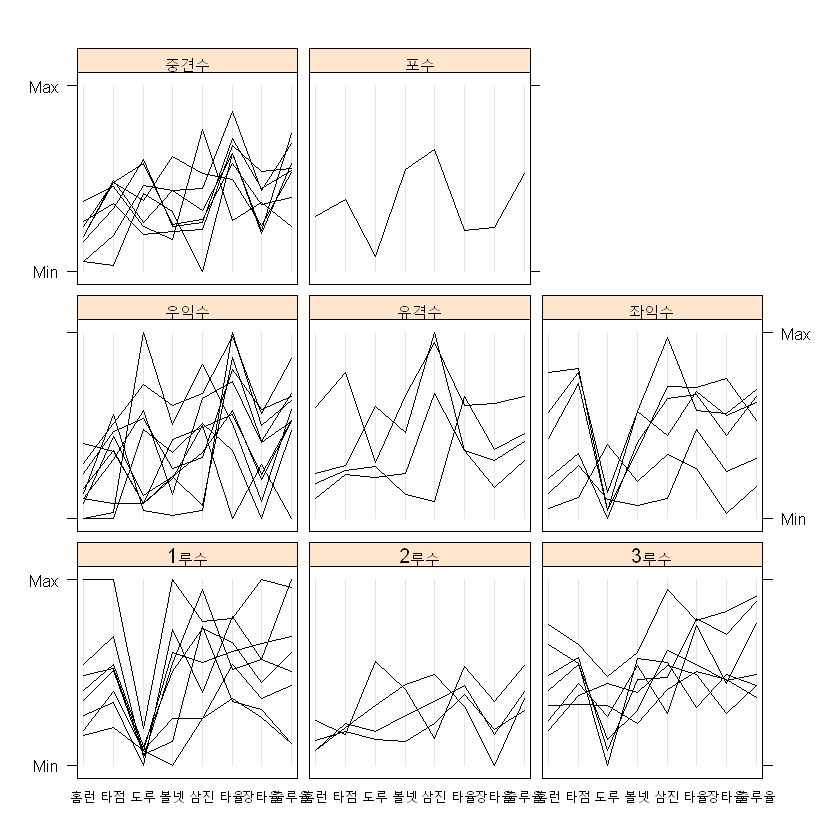

In [170]:
parallel(~bb2013[, 4:11] | position, horizontal.axis = F, col = 1)

Warning message:
"'parallel' is deprecated.
Use 'parallelplot' instead.
See help("Deprecated")"

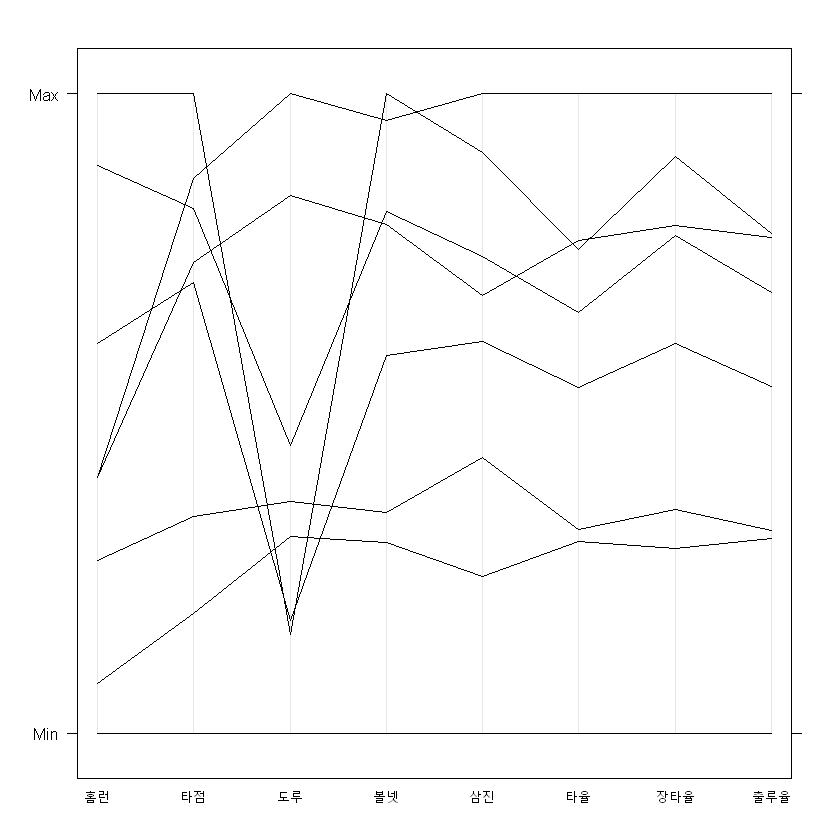

In [165]:
parallel(base2_pos2[,2:9], horizontal.axis = F, col = 1)

In [166]:
# 팀별 평행좌표
team = bb2013$팀
head(team)

[1] LG   롯데 LG   LG   한화 두산
Levels: KIA LG NC SK 넥센 두산 롯데 삼성 한화

Warning message:
"'parallel' is deprecated.
Use 'parallelplot' instead.
See help("Deprecated")"

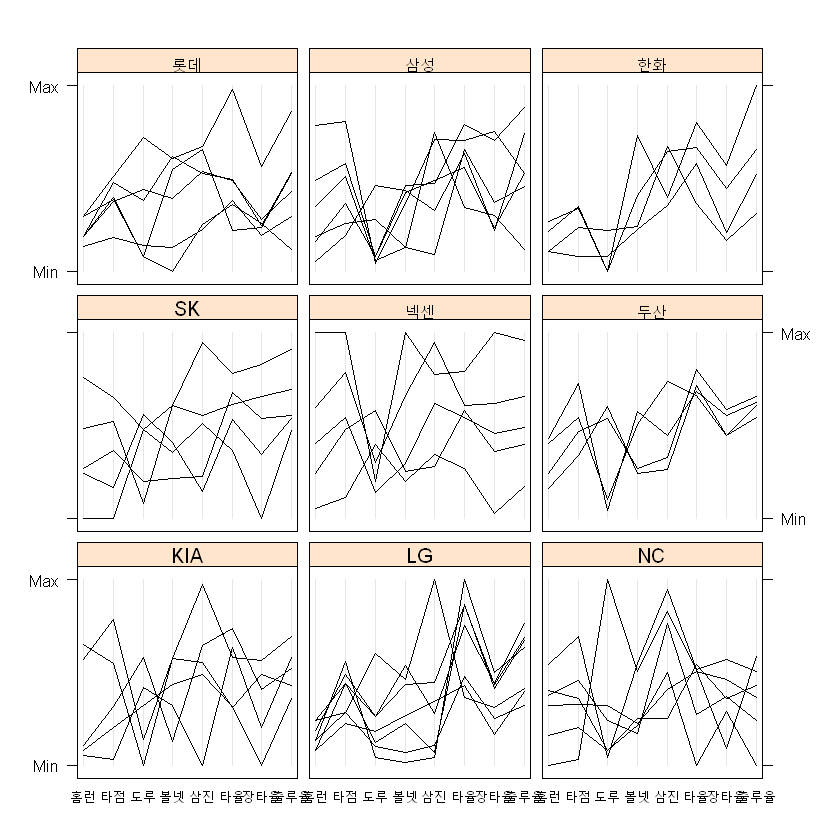

In [169]:
parallel(~bb2013[, 4:11] | team, horizontal.axis = F, col = 1)

In [171]:
# 3.
rownames(bb2013) = bb2013[,1]
head(bb2013)

,선수명,포지션,팀,홈런,타점,도루,볼넷,삼진,타율,장타율,출루율
이병규,이병규,우익수,LG,5,74,2,22,40,0.348,0.455,0.384
손아섭,손아섭,우익수,롯데,11,69,36,64,88,0.345,0.474,0.421
이진영,이진영,우익수,LG,3,62,6,37,42,0.329,0.429,0.390
박용택,박용택,중견수,LG,7,67,13,52,71,0.328,0.435,0.393
김태균,김태균,1루수,한화,10,52,0,73,67,0.319,0.475,0.444
민병헌,민병헌,우익수,두산,9,65,27,40,62,0.319,0.480,0.387


In [173]:
model = prcomp(bb2013[,4:11], scale = T)
model

Standard deviations (1, .., p=8):
[1] 1.9984170 1.2933340 1.1273099 0.7607107 0.5327592 0.3790445 0.1728049
[8] 0.1635227

Rotation (n x k) = (8 x 8):
              PC1         PC2         PC3        PC4         PC5        PC6
홈런    0.4289375 -0.32505498 -0.05217211  0.1576877 -0.40603328  0.2914142
타점    0.4368352 -0.20896193 -0.17802305  0.2636501  0.06332685 -0.7474614
도루   -0.0962041  0.35004304  0.65328672  0.5637745 -0.32521536 -0.1040466
볼넷    0.3687528  0.02115939  0.40738879 -0.5912223 -0.30932996 -0.2703765
삼진    0.2547089 -0.38326663  0.52772124  0.1044931  0.67401926  0.2029520
타율    0.2712544  0.59121776 -0.20466492  0.1812254  0.36287231 -0.1090360
장타율  0.4598904  0.04619767 -0.21191832  0.2901126 -0.17654419  0.4152104
출루율  0.3605537  0.47867563  0.08689014 -0.3321308  0.11193975  0.2167301
               PC7           PC8
홈런   -0.13207972  0.6446194605
타점   -0.27890619 -0.1543010483
도루   -0.08146900 -0.0190130626
볼넷    0.42117748 -0.0434191276
삼진    0.05769859 -0.000977

In [174]:
summary(model)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9984 1.2933 1.1273 0.76071 0.53276 0.37904 0.17280
Proportion of Variance 0.4992 0.2091 0.1588 0.07234 0.03548 0.01796 0.00373
Cumulative Proportion  0.4992 0.7083 0.8671 0.93949 0.97497 0.99292 0.99666
                           PC8
Standard deviation     0.16352
Proportion of Variance 0.00334
Cumulative Proportion  1.00000

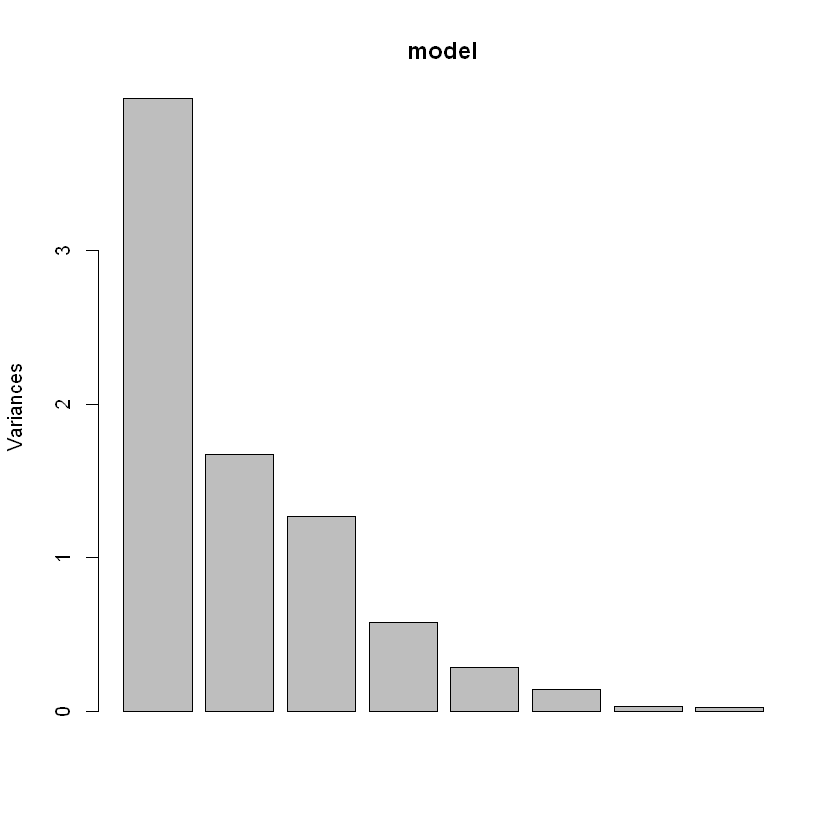

In [175]:
plot(model)

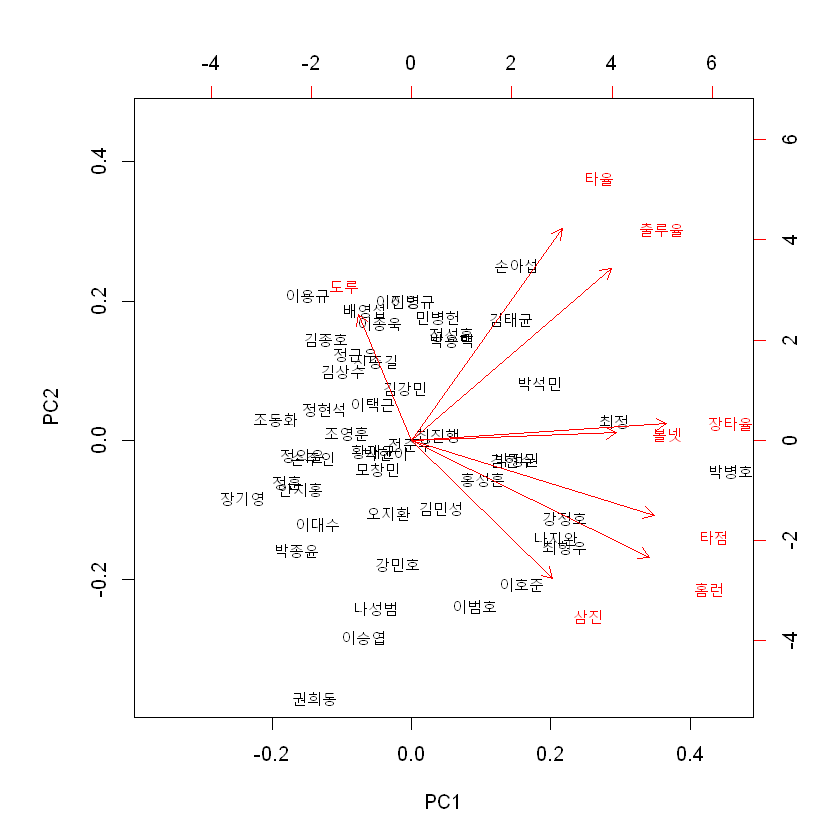

In [179]:
biplot(model)

In [178]:
model$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
홈런,0.4289375,-0.32505498,-0.05217211,0.1576877,-0.40603328,0.2914142,-0.13207972,0.6446194605
타점,0.4368352,-0.20896193,-0.17802305,0.2636501,0.06332685,-0.7474614,-0.27890619,-0.1543010483
도루,-0.0962041,0.35004304,0.65328672,0.5637745,-0.32521536,-0.1040466,-0.08146900,-0.0190130626
볼넷,0.3687528,0.02115939,0.40738879,-0.5912223,-0.30932996,-0.2703765,0.42117748,-0.0434191276
삼진,0.2547089,-0.38326663,0.52772124,0.1044931,0.67401926,0.2029520,0.05769859,-0.0009771494
타율,0.2712544,0.59121776,-0.20466492,0.1812254,0.36287231,-0.1090360,0.42514998,0.4217043486
장타율,0.4598904,0.04619767,-0.21191832,0.2901126,-0.17654419,0.4152104,0.28103087,-0.6121649520
출루율,0.3605537,0.47867563,0.08689014,-0.3321308,0.11193975,0.2167301,-0.67651950,-0.0763464442
